<p align="center">
  <img src="https://github.com/VictorGuevaraP/IA-DS_RESEARCH/blob/master/URPalma-1.png?raw=true" alt="GitHub Image" width="500px">
</p>

# **PROGRAMA DE ESPECIALIZACIÓN: DEEP LEARNING FOR DATA SCIENCE SPECIALIST**
**ACTIVIDAD - FIN DE MODULO I**



Objetivos:

> Comprender los fundamentos detrás de las redes neuronales artificiales.

> Comprender, implementar y entrenar redes neuronales utilizando TensorFlow y Keras (Pytorch)

> Aplicar redes neuronales a un problema real, evaluando su efectividad y ajustando parámetros para mejorar los resultados.

**Opcional:** La actividad puede desarrollar en grupos de dos intergantes máximo

## Fases del Proyecto

 1. **Selección de Problema y Entendimiento de caso**: Plantear un caro real (de los compratidos en clase para experimentación: Detección de fraude con tarjetas de crédito, Clasificación de préstamo u otro que considere relevante)

 2. **Recolección de Datos y preprocesamiento**:  preparar el conjunto de datos (Esto implica limpieza, normalización y, si es necesario, etc).

 3. **Diseño e Implementación de la Red Neuronal** Diseñar una arquitectura de red neuronal adecuada para el problema. Considerar aspectos como el número de capas, el tipo de capas, funciones de activación y técnicas de regularización... (MODELO BASE)

4. **Entrenamiento y Evaluación:** Entrenar la red neuronal con el conjunto de datos preparado. Monitorear métricas de rendimiento como la precisión y la pérdida durante el entrenamiento.

5. **Ajuste y Optimización** Ajustar hiperparámetros y realizar modificaciones en la arquitectura si es necesario para mejorar el rendimiento del modelo. (Aplicar GridSearch)

6. **Presentación de Resultados** Documentar (en colab) todo el proceso de desarrollo, incluyendo decisiones tomadas, problemas enfrentados y cómo se solucionaron.

**Fecha de presentación: DOMINGO 24 - Aula Virtual**

**PRESENTACIÓN EN COLAB**

# Index

1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preparation](#data-preparation)
4. [Modeling](#modeling)
5. [Evaluation](#evaluation)
6. [Hyperparameter Tuning](#tuning)
7. [Deployment](#deployment)
8. [Conclusion](#conclusion)

# 1. Business Understanding <a name="business-understanding"></a>

**Contexto:**
La aprobación de préstamos es un proceso crucial en la industria financiera que impacta tanto a individuos como a empresas. La capacidad de una entidad financiera para evaluar de manera precisa la solvencia y el riesgo asociado con los préstamos tiene implicaciones significativas en la estabilidad económica y el bienestar de la sociedad en su conjunto.

**Objetivo:**
El objetivo principal de la aprobación de préstamos es asegurar que los fondos sean asignados de manera responsable a aquellos que tienen la capacidad de pagarlos sin incurrir en dificultades financieras significativas. Además, un enfoque efectivo en la aprobación de préstamos puede fomentar el crecimiento económico al proporcionar acceso a capital para inversiones productivas y proyectos que impulsen la innovación y el desarrollo empresarial.

# 2. Data Understanding <a name="data-understanding"></a>

**Data Source:**  
The data used in this project is from Kaggle: [Loan Approval Classification](https://www.kaggle.com/datasets/hunter017/loan-approval-classification)

| Columns of Dataset       |
|--------------------------|
| loan_id                  |
| no_of_dependents         |
| education                |
| self_employed            |
| income_annum             |
| loan_amount              |
| loan_term                |
| cibil_score              |
| residential_assets_value |
| commercial_assets_value  |
| luxury_assets_value      |
| bank_asset_value         |
| loan_status              |


## Data Collection

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%time
%%capture
!pip install keras==3.0.5
!pip install tensorflow
!pip install keras
!pip install scikeras
!pip install opendatasets
!pip install datasets

CPU times: user 579 ms, sys: 70.5 ms, total: 650 ms
Wall time: 1min 5s


In [ ]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import probplot
import re
import pickle
#import cudf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, confusion_matrix, average_precision_score
from sklearn import metrics as metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV

from scikeras.wrappers import KerasClassifier
import scikeras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
import tensorflow as tf
from numpy.random import seed
from tensorflow.random import set_seed
from keras.initializers import RandomUniform
from keras import initializers

import warnings
warnings.filterwarnings("ignore")

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
## path para drive
path = "/content/drive/Othercomputers/Jesús - Laptop HP/Data Science/Jesús - PC/Repositorio de Projectos/Project 8 - Loan Approval Classification/loan_approval_dataset.csv"

In [ ]:
%%time
df = pd.read_csv(path)

CPU times: user 22.3 ms, sys: 9.34 ms, total: 31.7 ms
Wall time: 1.23 s


## Data Description

In [ ]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2193,2194,0,Graduate,Yes,7800000,23300000,10,587,12500000,9300000,27500000,9700000,Approved
171,172,0,Not Graduate,No,1900000,4100000,18,801,400000,800000,4800000,1200000,Approved
466,467,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000,Rejected
1984,1985,2,Graduate,Yes,6100000,15500000,8,758,8900000,4000000,13300000,7200000,Approved
474,475,1,Not Graduate,Yes,9200000,31500000,18,698,5300000,6100000,20400000,8300000,Approved


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.shape

(4269, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df = df.drop(['loan_id'], axis=1)

 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64


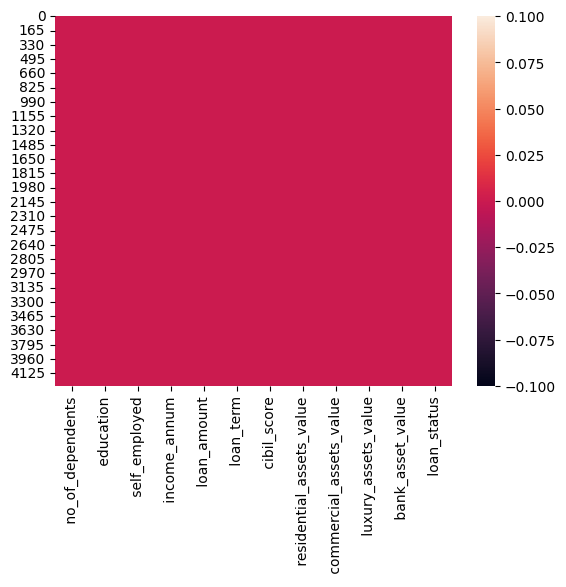

CPU times: user 598 ms, sys: 119 ms, total: 717 ms
Wall time: 626 ms


In [ ]:
%%time
print(round(df.isnull().sum()/len(df), 2))
sns.heatmap(df.isnull())
plt.show();

In [ ]:
def unique_values_message(dataframe):
    def get_unique_values_count(column):
        if column.dtype == 'object':
            return len(column.unique())
        return 0

    unique_counts = dataframe.apply(get_unique_values_count)

    messages = []
    for column, count in unique_counts.items():
        if count > 0:
            messages.append(f"The column <{column}> has {count} unique values.")

    return print('\n'.join(messages))

In [ ]:
unique_values_message(df)

The column < education> has 2 unique values.
The column < self_employed> has 2 unique values.
The column < loan_status> has 2 unique values.


In [ ]:
def custom_describe(dataframe, excluded_columns=None):
    if excluded_columns is None:
        numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    else:
        numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns.difference(excluded_columns)

    percentiles = [1, 3, 5, 10, 25, 50, 75, 90, 92, 95, 99]
    describe_result = dataframe[numeric_columns].describe(percentiles=[p/100 for p in percentiles]).T

    return display(describe_result)

In [ ]:
custom_describe(df)

,count,mean,std,min,1%,3%,5%,10%,25%,50%,75%,90%,92%,95%,99%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,5.0,5.0,5.0,5.00,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,300000.0,500000.0,600000.0,1100000.0,2700000.0,5100000.0,7500000.0,8900000.0,9100000.0,9400000.0,9800000.00,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,700000.0,1204000.0,1800000.0,3200000.0,7700000.0,14500000.0,21500000.0,28000000.0,29000000.0,30900000.0,35700000.00,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,2.0,2.0,2.0,4.0,6.0,10.0,16.0,18.0,20.0,20.0,20.00,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,304.0,317.0,330.0,360.0,453.0,600.0,748.0,837.0,849.0,869.0,894.32,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,0.0,100000.0,300000.0,700000.0,2200000.0,5600000.0,11300000.0,17200000.0,18600000.0,21260000.0,25400000.00,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,0.0,100000.0,200000.0,400000.0,1300000.0,3700000.0,7600000.0,11700000.0,12400000.0,13900000.0,16732000.00,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,700000.0,1300000.0,1900000.0,3200000.0,7500000.0,14600000.0,21700000.0,27720000.0,29100000.0,31300000.0,36032000.00,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,200000.0,300000.0,500000.0,1000000.0,2300000.0,4600000.0,7100000.0,9700000.0,10200000.0,11100000.0,13100000.00,14700000.0


## Exploratory Data Analysis (E.D.A)

In [ ]:
def plot_heatmap(df, target_column, exclude_column=None):
    if exclude_column:
        df = df.drop(columns=[exclude_column])

    yes = df[df[target_column] == ' Approved'].describe().T
    no = df[df[target_column] == ' Rejected'].describe().T
    colors = ['#F93822', '#FDD20E']

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

    # Subplot para los targets que sí
    sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=1, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
    ax[0].set_title('Target cometerá fraude')

    # Subplot para los targets que no
    sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=1, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
    ax[1].set_title('Target no cometerá fraude')

    plt.tight_layout()
    plt.show();

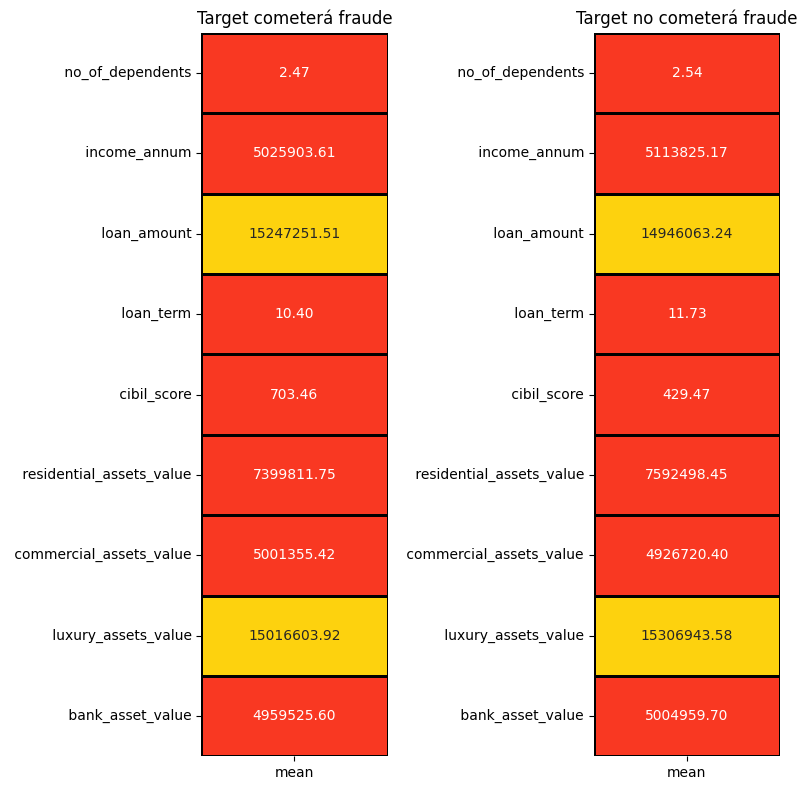

In [ ]:
plot_heatmap(df, ' loan_status')

In [ ]:
def plot_target_distribution(df, target_column):
    plt.figure(figsize=(12, 4))

    # Gráfico de pastel (Pie chart)
    plt.subplot(1, 2, 1)
    segmentation_counts = df[target_column].value_counts()
    plt.pie(segmentation_counts, labels=segmentation_counts.index, autopct='%1.1f%%', colors=["skyblue", "lightgreen"])
    plt.title(f'{target_column} Distribution')

    # Gráfico de barras (Bar chart)
    plt.subplot(1, 2, 2)
    ax = sns.countplot(x=target_column, data=df, palette=["skyblue", "lightgreen"])
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center')
    plt.title(f'{target_column} Count')

    plt.tight_layout()
    plt.show();

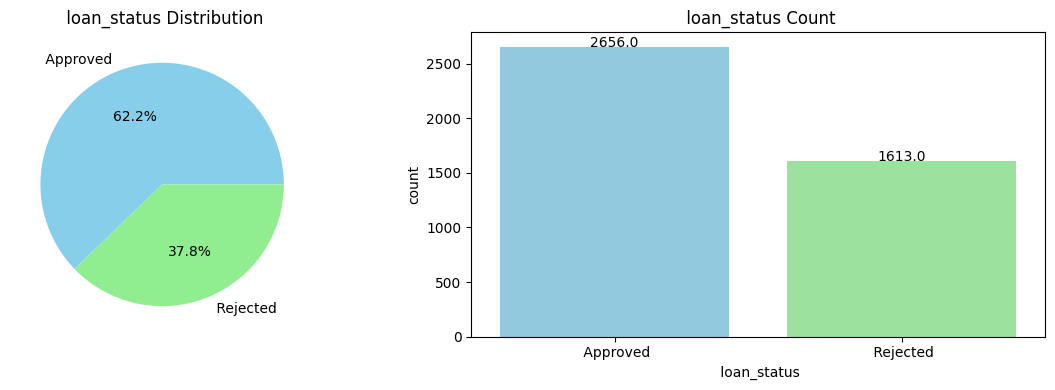

In [ ]:
plot_target_distribution(df, ' loan_status')

In [ ]:
# Obtener variables cualitativas y cuantitaivas
numericas_df = df.select_dtypes(exclude=['object']).columns
cualitativas_df = df.select_dtypes(include=['object']).columns

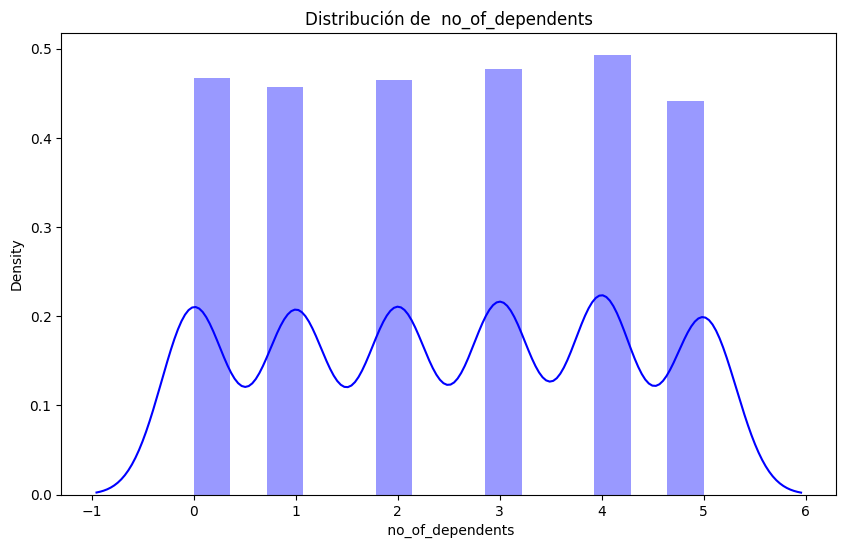

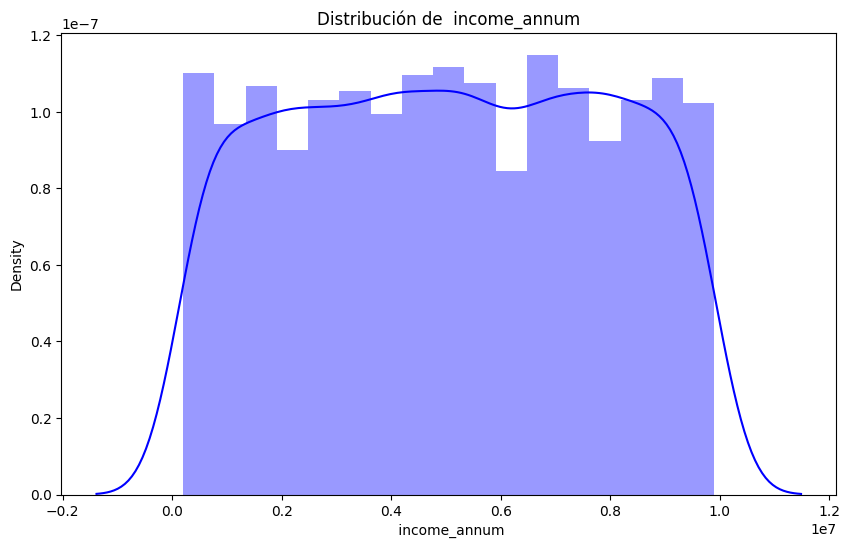

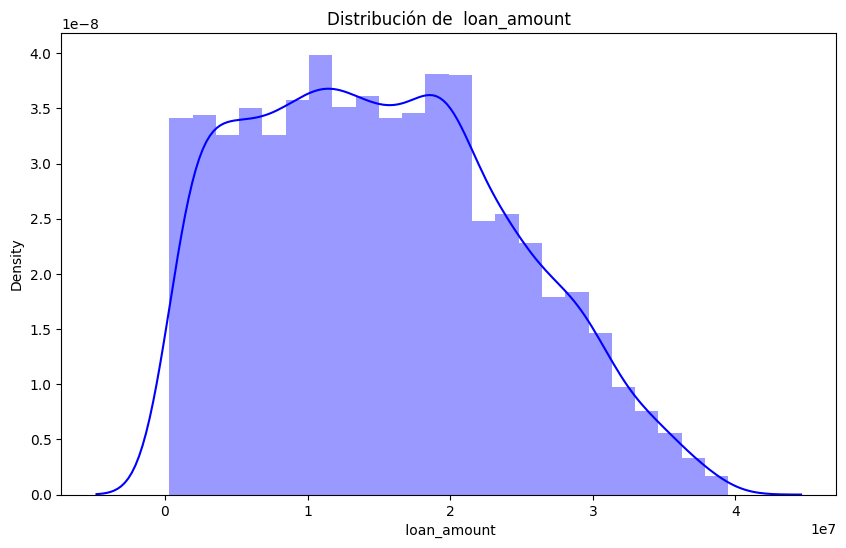

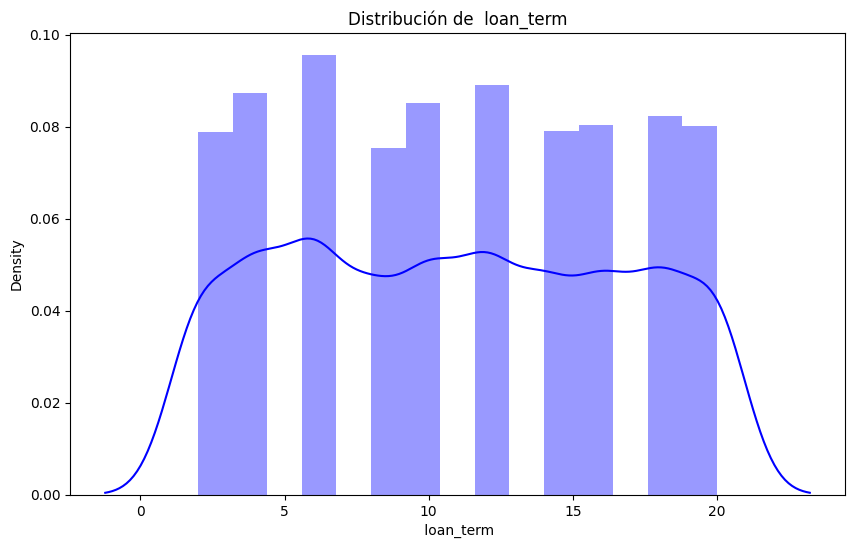

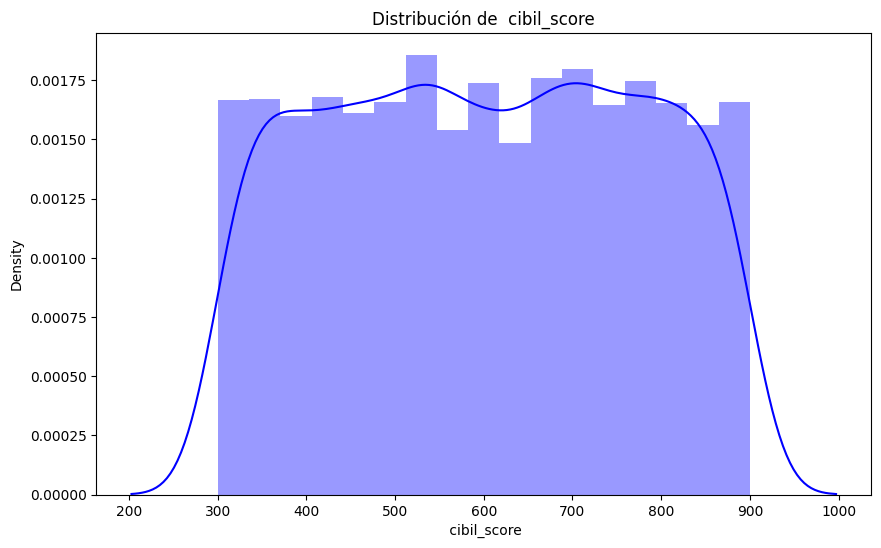

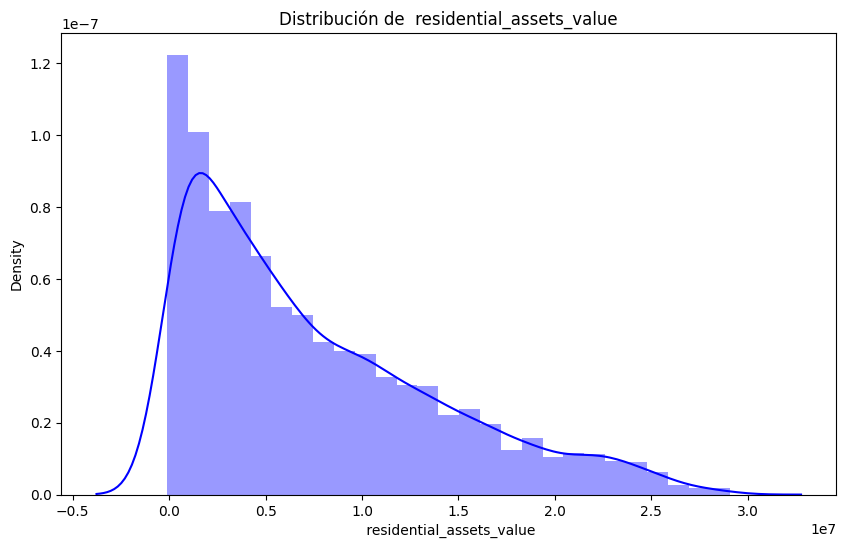

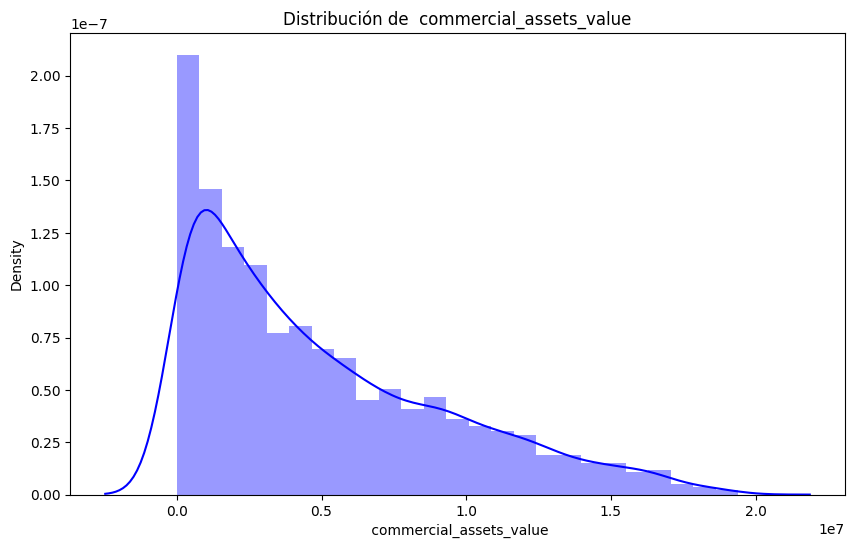

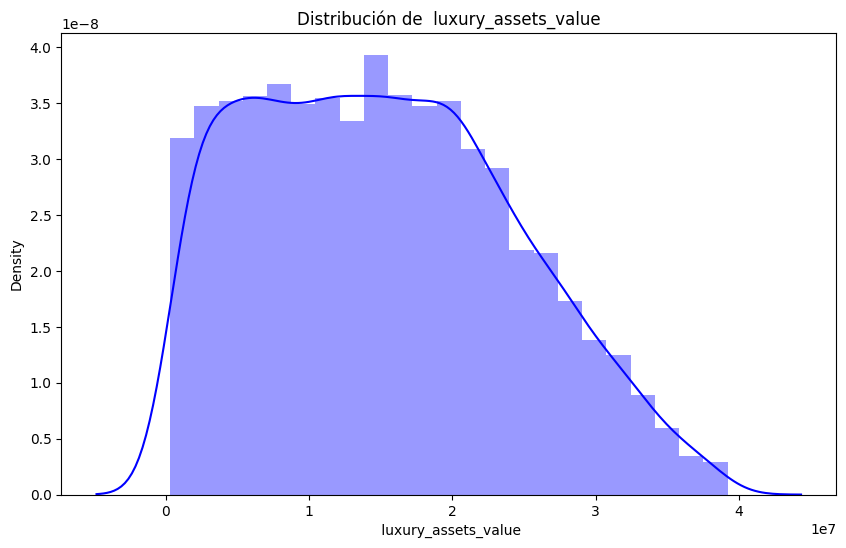

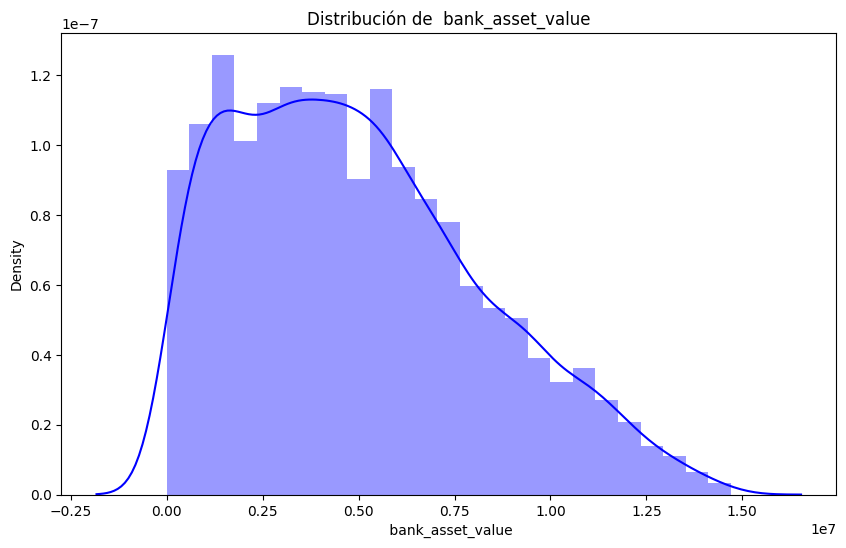

In [ ]:
#Para todas las variables numéricas
for columna in numericas_df:
    plt.figure(figsize=(10, 6))  # Crea una nueva figura para cada distribución tamaño
    sns.distplot(df[columna], kde=True, color='blue')  # kde=True añade la línea de densidad del kernel
    plt.title(f'Distribución de {columna}')  # Establece un título para cada gráfico
    plt.show();

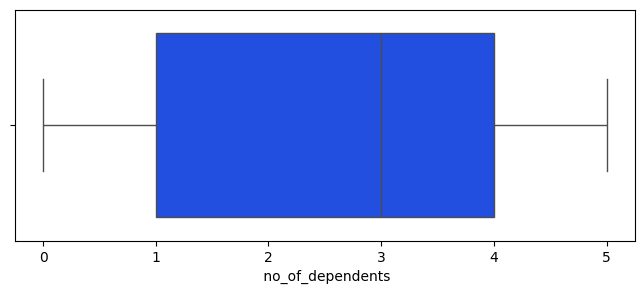

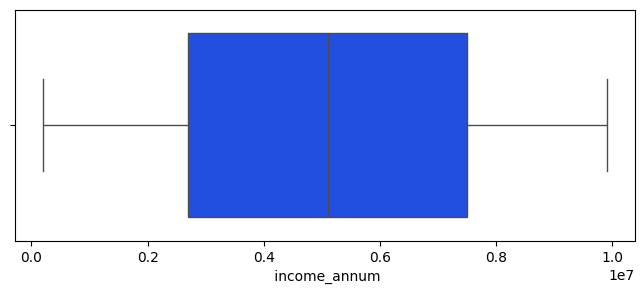

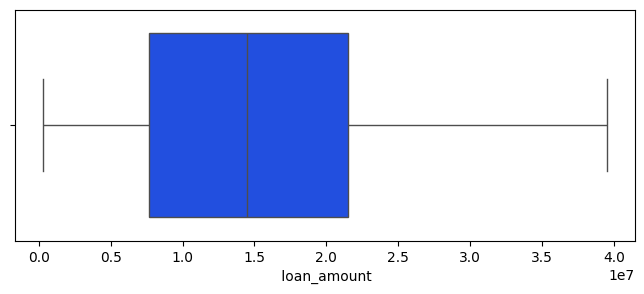

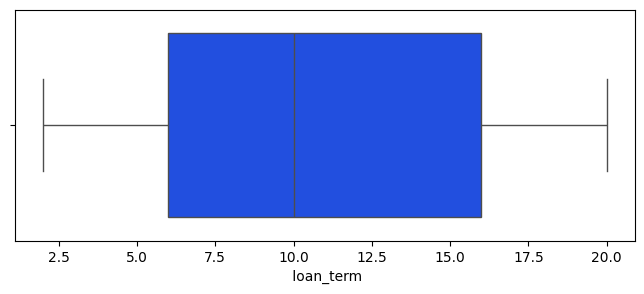

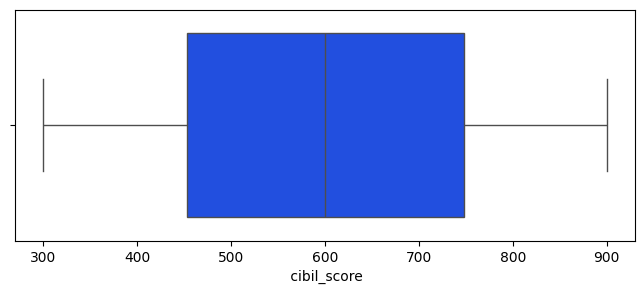

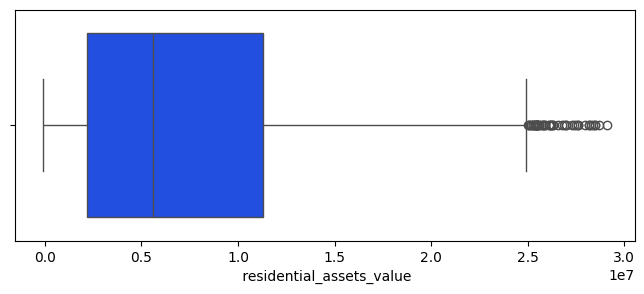

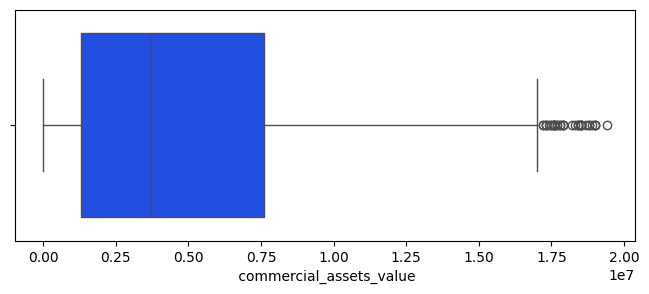

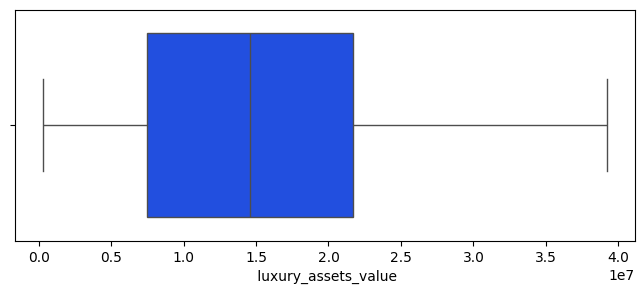

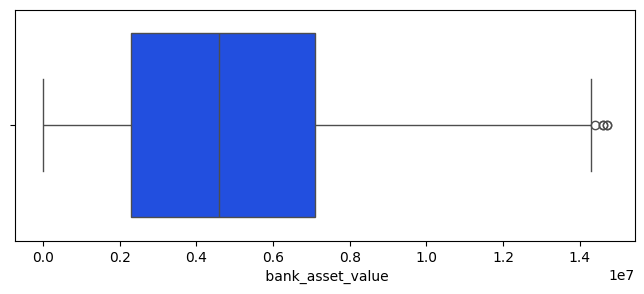

In [ ]:
# Obtener diagrama de cajas para cada uno
for variable in numericas_df:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[variable], palette="bright")
    plt.show();

# 3. Data Preparation <a name="data-preparation"></a>

## Data Cleaning

In [ ]:
data = df.copy()

In [ ]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
def clean_feature_names(df):
    # Define a regular expression pattern to match special characters and leading spaces
    pattern = r'^[^\w]+'

    # Apply the cleaning to each column name in the DataFrame
    cleaned_columns = [re.sub(pattern, '', col) for col in df.columns]

    # Update the DataFrame with cleaned column names
    df.columns = cleaned_columns

    return df

In [ ]:
data = clean_feature_names(data)

In [ ]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
def handle_outliers(dataframe, target_column, min_percentile, maX_percentile):
    new_dataframe = dataframe.copy()

    numeric_columns = new_dataframe.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns.difference([target_column])

    for column in numeric_columns:
        unique_values = new_dataframe[column].nunique()
        if unique_values >= 15:
            min_threshold = round(new_dataframe[column].quantile(min_percentile), 0)
            maX_threshold = round(new_dataframe[column].quantile(maX_percentile), 0)
            print(f'column: {column} min: {min_threshold} max: {maX_threshold}')
            new_dataframe[column] = np.where(new_dataframe[column] <= min_threshold, min_threshold, new_dataframe[column])
            new_dataframe[column] = np.where(new_dataframe[column] >= maX_threshold, maX_threshold, new_dataframe[column])

    return new_dataframe

In [ ]:
data = handle_outliers(dataframe=data,
                       target_column='loan_status',
                       min_percentile = 0.005,
                       maX_percentile = .9998)

column: bank_asset_value min: 100000.0 max: 14700000.0
column: cibil_score min: 302.0 max: 900.0
column: commercial_assets_value min: 0.0 max: 19058560.0
column: income_annum min: 200000.0 max: 9900000.0
column: loan_amount min: 500000.0 max: 38902480.0
column: luxury_assets_value min: 500000.0 max: 39114640.0
column: residential_assets_value min: -100000.0 max: 28758560.0


## Feature Engineering

In [ ]:
def encode_features_with_label_encoder(dataframe):
    encoded_dataframe = dataframe.copy()

    label_encoder = LabelEncoder()

    encoded_dataframe = encoded_dataframe.apply(lambda x: pd.Series(label_encoder.fit_transform(x), name=x.name) if x.dtype == 'object' else x)

    return encoded_dataframe

In [ ]:
data = encode_features_with_label_encoder(data)

## Format data

In [ ]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   int64  
 2   self_employed             4269 non-null   int64  
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   float64
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 400.3 KB


In [ ]:
custom_describe(data)

,count,mean,std,min,1%,3%,5%,10%,25%,50%,75%,90%,92%,95%,99%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,5.0,5.0,5.0,5.00,5.0
education,4269.0,4.977747e-01,5.000536e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,300000.0,500000.0,600000.0,1100000.0,2700000.0,5100000.0,7500000.0,8900000.0,9100000.0,9400000.0,9800000.00,9900000.0
loan_amount,4269.0,1.513376e+07,9.042266e+06,500000.0,700000.0,1204000.0,1800000.0,3200000.0,7700000.0,14500000.0,21500000.0,28000000.0,29000000.0,30900000.0,35700000.00,38902480.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,2.0,2.0,2.0,4.0,6.0,10.0,16.0,18.0,20.0,20.0,20.00,20.0
cibil_score,4269.0,5.999431e+02,1.724182e+02,302.0,304.0,317.0,330.0,360.0,453.0,600.0,748.0,837.0,849.0,869.0,894.32,900.0
residential_assets_value,4269.0,7.472537e+06,6.503373e+06,-100000.0,0.0,100000.0,300000.0,700000.0,2200000.0,5600000.0,11300000.0,17200000.0,18600000.0,21260000.0,25400000.00,28758560.0
commercial_assets_value,4269.0,4.973075e+06,4.388706e+06,0.0,0.0,100000.0,200000.0,400000.0,1300000.0,3700000.0,7600000.0,11700000.0,12400000.0,13900000.0,16732000.00,19058560.0
luxury_assets_value,4269.0,1.512671e+07,9.103020e+06,500000.0,700000.0,1300000.0,1900000.0,3200000.0,7500000.0,14600000.0,21700000.0,27720000.0,29100000.0,31300000.0,36032000.00,39114640.0


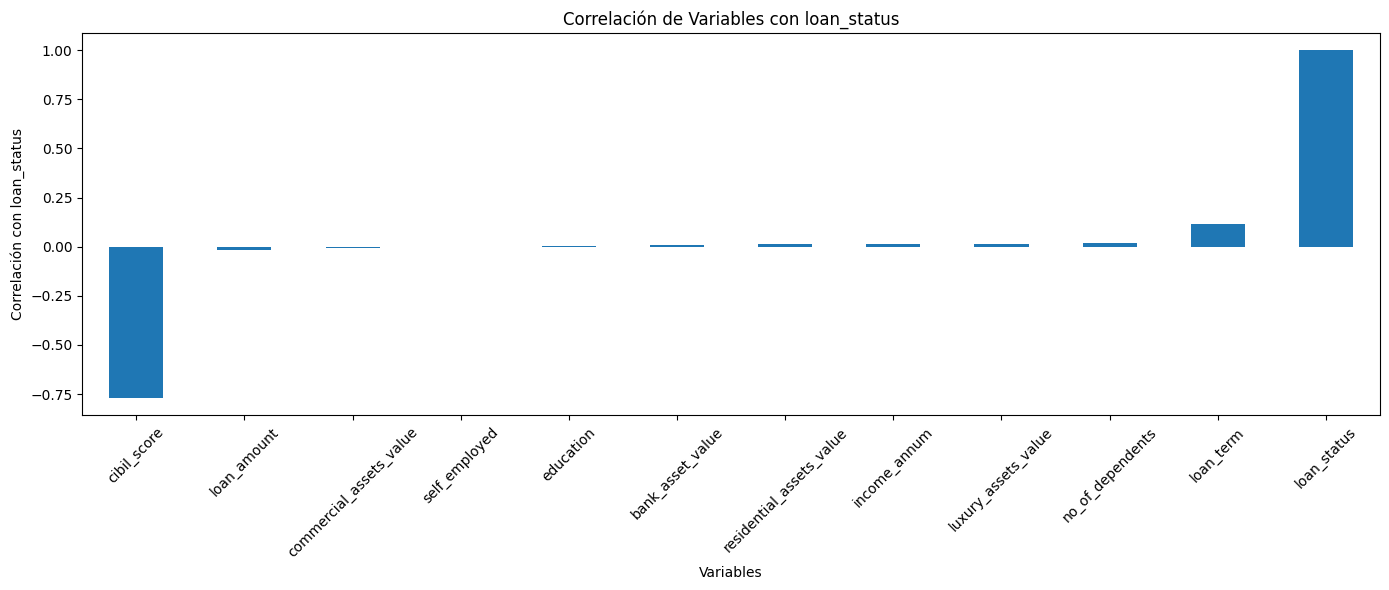

In [ ]:
# Suponiendo que ya tienes el DataFrame "prestamo_df" y su correlación con la columna "Pago"
correlaciones = data.corr()['loan_status'].sort_values()

# Crear la gráfica de barras
plt.figure(figsize=(14, 6))
correlaciones.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlación con loan_status')
plt.title('Correlación de Variables con loan_status')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show();

# 4. Modeling <a name="modeling"></a>

## Select learning algorithms

## Data Split

In [ ]:
def generate_data_splits(dataframe, target_name, train_proportion, validation_proportion, test_proportion):
    # Separate features and target
    X = dataframe.drop(columns=[target_name])
    y = dataframe[target_name]

    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_proportion, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_proportion / (test_proportion + validation_proportion), random_state=42)

    # Create subplots
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    # Bar plot for data split
    num_records = [len(X_train), len(X_val), len(X_test)]
    bars = axes[0].bar(['X_train', 'X_val', 'X_test'], num_records)
    axes[0].set_ylabel('Number of Records')
    axes[0].set_title('Data Split')

    for bar, num in zip(bars, num_records):
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, int(num), ha='center', va='bottom', fontsize=14)

    # Pie plots for target distribution
    def plot_pie(data, title, ax):
        wedges, texts, autotexts = ax.pie(data.value_counts(), labels=data.value_counts().index, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(title)

        for autotext in autotexts:
            autotext.set_fontsize(14)

    plot_pie(y_train, 'y_train', axes[1])
    plot_pie(y_val, 'y_val', axes[2])
    plot_pie(y_test, 'y_test', axes[3])

    plt.tight_layout()
    plt.show()

    return X_train, y_train, X_val, y_val, X_test, y_test

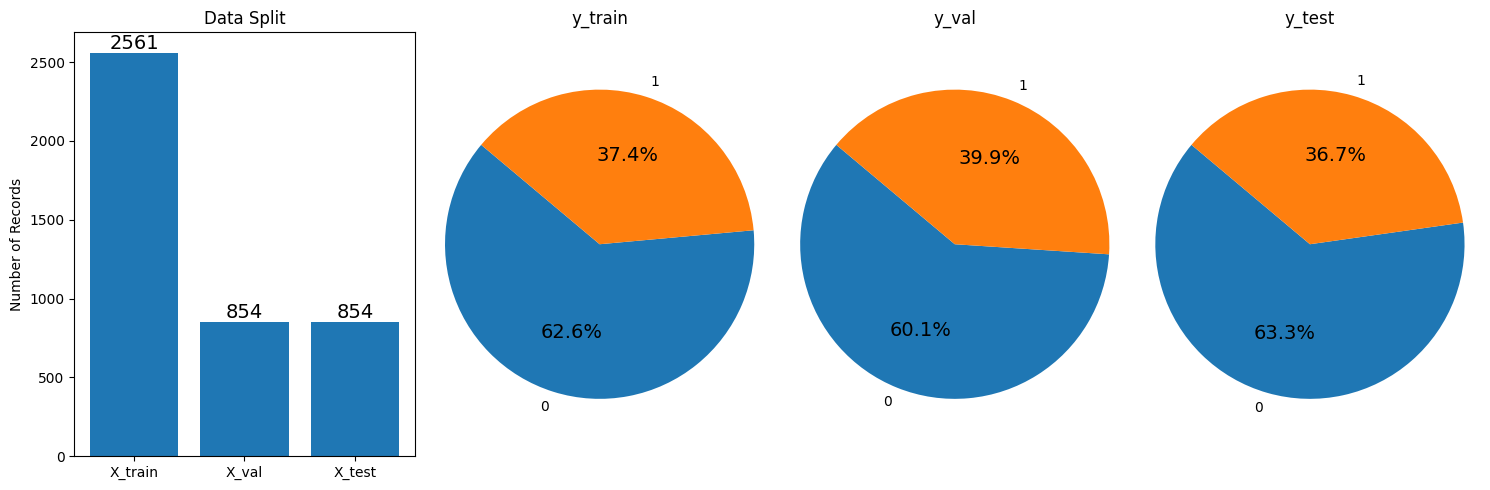

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = generate_data_splits(
    dataframe = data,
    target_name = 'loan_status',
    train_proportion = 0.6,
    validation_proportion = 0.2,
    test_proportion = 0.2
)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
# Aplicamos a los datos
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

## Train learning algorithms

#### Modelo Base

In [ ]:
def base_model(lyrs, act, opt):
    model = Sequential()
    # create first hidden layer
    model.add(Dense(units=lyrs[0], activation=act, input_shape=(X_train.shape[1],)))
    # create additional hidden layers
    for i in range(1, len(lyrs)):
        model.add(Dense(units=lyrs[i], activation=act))
    # create output layer
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
base_model = base_model([12, 6], 'relu', 'Adam')

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time
# Ajustamos a los datos de entrenamiento
base_model.fit(X_train,
           y_train,
           batch_size = 64,
           epochs = 20,
           validation_data = (X_val, y_val),
           verbose = 1)

Epoch 1/20
41/41 [==============================] - 4s 36ms/step - loss: 0.6935 - accuracy: 0.6064 - val_loss: 0.6954 - val_accuracy: 0.5902
Epoch 2/20
41/41 [==============================] - 0s 10ms/step - loss: 0.6529 - accuracy: 0.6306 - val_loss: 0.6621 - val_accuracy: 0.6089
Epoch 3/20
41/41 [==============================] - 0s 6ms/step - loss: 0.6213 - accuracy: 0.6638 - val_loss: 0.6278 - val_accuracy: 0.6300
Epoch 4/20
41/41 [==============================] - 0s 6ms/step - loss: 0.5863 - accuracy: 0.7048 - val_loss: 0.5876 - val_accuracy: 0.6885
Epoch 5/20
41/41 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.7407 - val_loss: 0.5375 - val_accuracy: 0.7529
Epoch 6/20
41/41 [==============================] - 0s 9ms/step - loss: 0.4949 - accuracy: 0.7794 - val_loss: 0.4847 - val_accuracy: 0.7904
Epoch 7/20
41/41 [==============================] - 0s 6ms/step - loss: 0.4440 - accuracy: 0.8298 - val_loss: 0.4312 - val_accuracy: 0.8361
Epoch 8/20
41/41 [

In [ ]:
# Transformamos a data frame - loss
hist_base = pd.DataFrame(base_model.history.history)
hist_base

,loss,accuracy,val_loss,val_accuracy
0,0.693539,0.606404,0.695410,0.590164
1,0.652940,0.630613,0.662109,0.608899
2,0.621339,0.663803,0.627844,0.629977
3,0.586346,0.704803,0.587586,0.688525
4,0.544052,0.740726,0.537500,0.752927
5,0.494914,0.779383,0.484708,0.790398
6,0.443974,0.829754,0.431214,0.836066
7,0.395916,0.850839,0.383812,0.859485
8,0.352752,0.874268,0.341826,0.873536
9,0.316116,0.890277,0.307967,0.891101


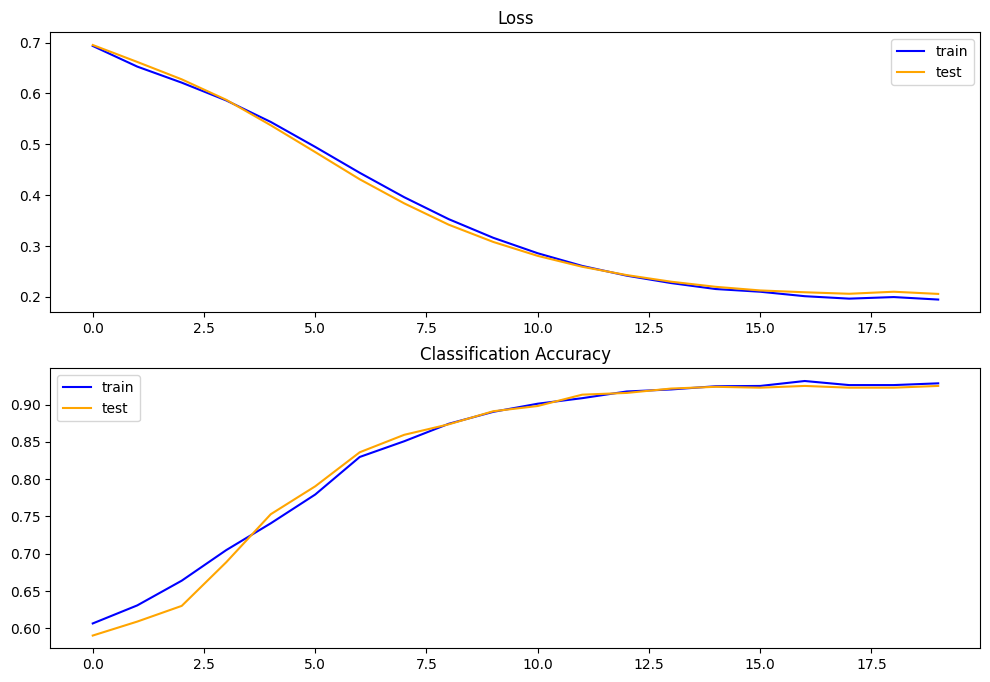

In [ ]:
# Graficar todo
plt.figure(figsize=(12, 8))
# Subplot para la pérdida
plt.subplot(211)
plt.title('Loss')  # Leyenda para el subplot de pérdida
plt.plot(hist_base['loss'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(hist_base['val_loss'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
# Subplot para la precisión de la clasificación
plt.subplot(212)
plt.title('Classification Accuracy')  # Leyenda para el subplot de precisión de clasificación
plt.plot(hist_base['accuracy'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(hist_base['val_accuracy'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
plt.show();

# 5. Evaluation <a name="evaluation"></a>

In [ ]:
def calculate_metrics(base_model, X_train, y_train, X_val, y_val):
    metrics_results = []

    # Entrenamos para los datos train
    y_train_pred = base_model.predict(X_train)
    y_train_pred = (y_train_pred > 0.5)
    y_train_prob = base_model.predict(X_train)[:, 0]

    # Entrenamos para los datos val
    y_val_pred = base_model.predict(X_val)
    y_val_pred = (y_val_pred > 0.5)
    y_val_prob = base_model.predict(X_val)[:, 0]

    # Calculando métricas para datos train
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 2)
    precision_train = round(precision_score(y_train, y_train_pred), 2)
    recall_train = round(recall_score(y_train, y_train_pred), 2)
    f1_train = round(f1_score(y_train, y_train_pred), 2)
    logloss_train = round(log_loss(y_train, y_train_prob), 2)
    gini_train = round(2 * roc_auc_score(y_train, y_train_prob) - 1, 2)
    auc_train = round(roc_auc_score(y_train, y_train_prob), 2)

    # Calculando métricas para datos val
    accuracy_val = round(accuracy_score(y_val, y_val_pred), 2)
    precision_val = round(precision_score(y_val, y_val_pred), 2)
    recall_val = round(recall_score(y_val, y_val_pred), 2)
    f1_val = round(f1_score(y_val, y_val_pred), 2)
    logloss_val = round(log_loss(y_val, y_val_prob), 2)
    gini_val = round(2 * roc_auc_score(y_val, y_val_prob) - 1, 2)
    auc_val = round(roc_auc_score(y_val, y_val_prob), 2)

    # Añadiendo al Dataframe
    metrics_results.append({
        "Model": "Artificial Neural Networks - Train",
        "Accuracy": accuracy_train,
        "Precision": precision_train,
        "Recall": recall_train,
        "F1-Score": f1_train,
        "Log Loss": logloss_train,
        "Gini": gini_train,
        "AUC Score": auc_train
        })

    metrics_results.append({
        "Model": "Artificial Neural Networks - Validation",
        "Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-Score": f1_val,
        "Log Loss": logloss_val,
        "Gini": gini_val,
        "AUC Score": auc_val
        })

    # Crear dataframes para train y val
    df = pd.DataFrame(metrics_results)
    return df

In [ ]:
%%time
results = calculate_metrics(base_model, X_train, y_train, X_val, y_val)
results

27/27 [==============================] - 0s 10ms/step
CPU times: user 1.31 s, sys: 47 ms, total: 1.36 s
Wall time: 3.39 s


,Model,Accuracy,Precision,Recall,F1-Score,Log Loss,Gini,AUC Score
0,Artificial Neural Networks - Train,0.93,0.9,0.92,0.91,0.19,0.95,0.98
1,Artificial Neural Networks - Validation,0.93,0.9,0.92,0.91,0.21,0.95,0.97


In [ ]:
def precision_recall_and_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(12, 6))

    for name, model in models.items():
        # Plotear curvas ROC
        plt.subplot(1, 2, 1)
        y_scores = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'{name} ROC curve (AUC = %0.2f)' % roc_auc)

        # Plotear la línea diagonal
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
        # Configurar etiquetas y título
        plt.xlabel('Tasa de falsos positivos')
        plt.ylabel('Tasa de verdaderos positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")

        # Plotear curvas Precision-Recall
        plt.subplot(1, 2, 2)
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        auc_value = average_precision_score(y_test, y_scores)
        plt.plot(recall, precision, lw=1, alpha=0.8, label=f'{name} Precision-Recall curve (AUC = %0.2f)' % auc_value)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Recall-Precision')
    plt.legend(loc="lower left")
    plt.grid(True)

    plt.tight_layout()
    plt.show();

27/27 [==============================] - 0s 6ms/step


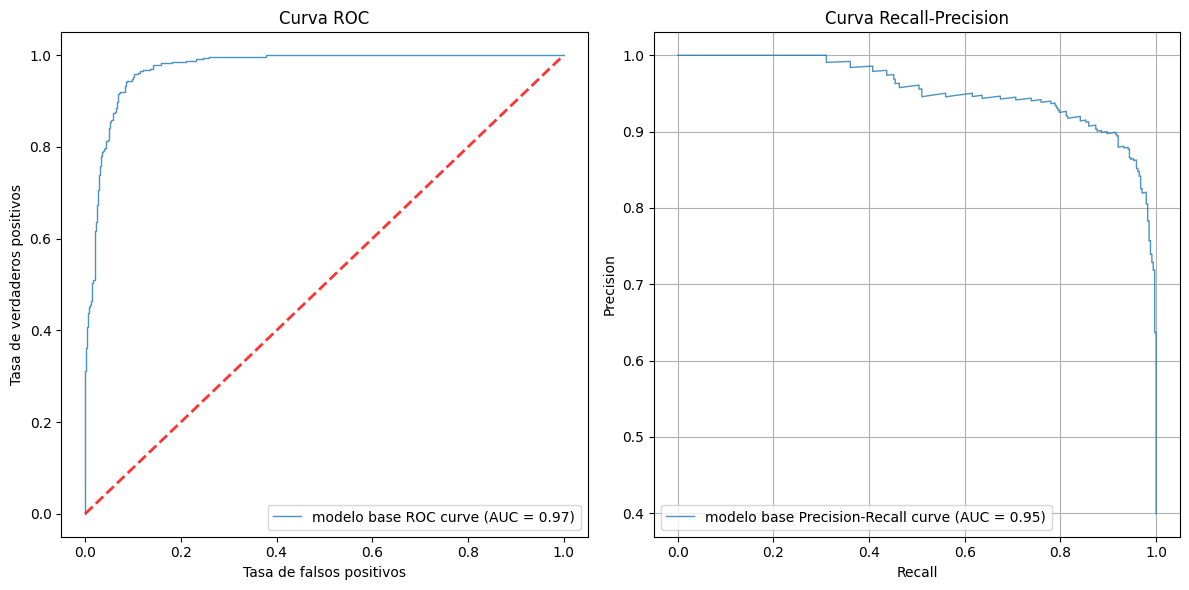

CPU times: user 1.03 s, sys: 55.8 ms, total: 1.09 s
Wall time: 3.06 s


In [ ]:
%%time
precision_recall_and_roc_curve( {"modelo base": base_model}, X_val, y_val)

In [ ]:
def set_labels(ax, labels, cm):
    tick_marks = np.arange(len(labels))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(labels, rotation=45, fontsize=12)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(labels, fontsize=12)
    ax.set_ylabel('Real Values', fontsize=14)
    ax.set_xlabel('Predicted Values', fontsize=14)

    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white', fontsize=16)

In [ ]:
def plot_confusion_matrix(model, X_train, y_train, X_val, y_val):
    # Convertir las probabilidades predichas en clases binarias usando un umbral de 0.5
    y_train_pred = (model.predict(X_train) > 0.5).astype(int)
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)

    # Matrices de confusión
    train_cm = confusion_matrix(y_train, y_train_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Matriz de confusión para el conjunto de entrenamiento
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_title('Matriz de Confusión del Conjunto de Entrenamiento')
    ax[0].set_xlabel('Etiquetas Predichas')
    ax[0].set_ylabel('Etiquetas Verdaderas')

    # Matriz de confusión para el conjunto de validación
    sns.heatmap(val_cm, annot=True, fmt="d", cmap="Blues", ax=ax[1])
    ax[1].set_title('Matriz de Confusión del Conjunto de Validación')
    ax[1].set_xlabel('Etiquetas Predichas')
    ax[1].set_ylabel('Etiquetas Verdaderas')

    plt.show();

27/27 [==============================] - 0s 7ms/step


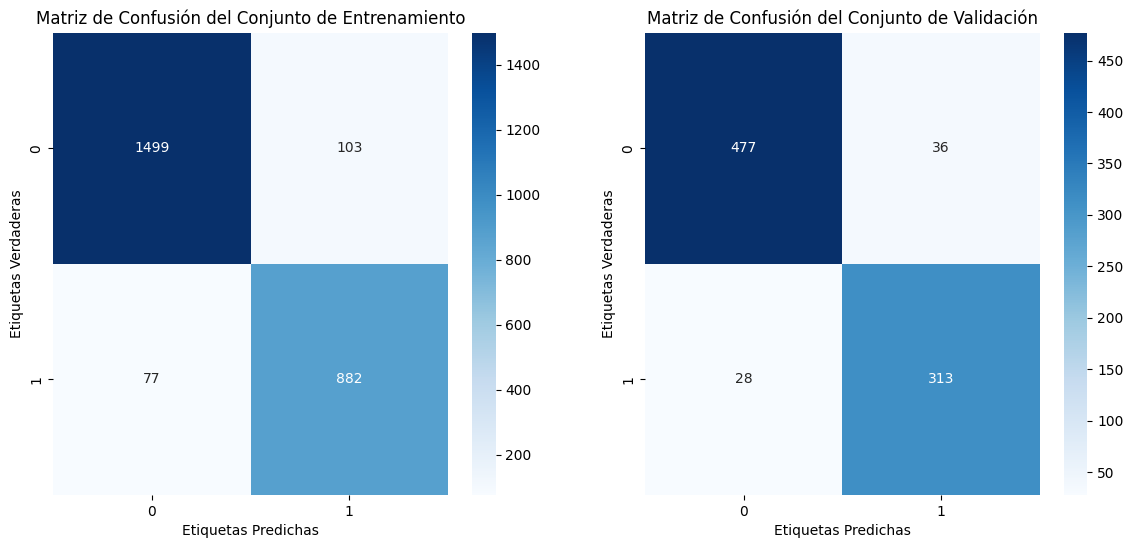

CPU times: user 1.37 s, sys: 73 ms, total: 1.44 s
Wall time: 2.38 s


In [ ]:
%%time
# Utilizar la función para plotear la matriz de confusión
plot_confusion_matrix(base_model,
                      X_train,
                      y_train,
                      X_val,
                      y_val)

## Evaluate algorithms

In [ ]:
def tradeoff_evaluation(x_val, y_val, models, threshold=0.5):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss', 'Gini', 'AUC Score']
    val_results = []

    for name, model in models.items():
        # Validation set metrics
        y_val_prob = model.predict(x_val)
        y_val_pred = (y_val_prob > threshold).astype(int)
        val_accuracy = round(accuracy_score(y_val, y_val_pred), 2)
        val_precision = round(precision_score(y_val, y_val_pred), 2)
        val_recall = round(recall_score(y_val, y_val_pred), 2)
        val_f1 = round(f1_score(y_val, y_val_pred), 2)
        val_log_loss = round(log_loss(y_val, y_val_prob), 2)
        val_roc_auc = round(roc_auc_score(y_val, y_val_prob), 2)
        val_fpr, val_tpr, _ = roc_curve(y_val, y_val_prob)
        val_gini = round(2 * auc(val_fpr, val_tpr) - 1, 2)

        val_results.append([val_accuracy, val_precision, val_recall, val_f1, val_log_loss, val_gini, val_roc_auc])

    val_results_df = pd.DataFrame(val_results, columns=metrics, index=models.keys())
    return val_results_df

In [ ]:
%%time
validation_threshold_results = tradeoff_evaluation(X_val,
                                                   y_val,
                                                   {"modelo base": base_model},
                                                   threshold=0.42)

27/27 [==============================] - 0s 4ms/step
CPU times: user 226 ms, sys: 4.32 ms, total: 230 ms
Wall time: 615 ms


In [ ]:
validation_threshold_results

,Accuracy,Precision,Recall,F1-Score,Log Loss,Gini,AUC Score
modelo base,0.93,0.88,0.94,0.91,0.21,0.95,0.97


In [ ]:
def evaluate_tradeoff_and_plot_models(models, x_set, y_set, threshold):
    for name, model in models.items():
        # Evaluate model
        y_pred_prob = model.predict(x_set)
        y_pred_binary = (y_pred_prob > threshold).astype(int)

        # Plot confusion matrix
        cm = confusion_matrix(y_set, y_pred_binary)
        plt.imshow(cm, interpolation='nearest', cmap='RdYlGn')
        plt.title(f'Confusion Matrix - {name}', fontsize=20)
        tick_marks = np.arange(len(np.unique(y_set)))
        plt.xticks(tick_marks, np.unique(y_set), rotation=45, fontsize=14)
        plt.yticks(tick_marks, np.unique(y_set), fontsize=14)
        plt.ylabel('Real Values', fontsize=14)
        plt.xlabel('Predicted Values', fontsize=14)
        for i in range(len(np.unique(y_set))):
            for j in range(len(np.unique(y_set))):
                plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white', fontsize=20)

        plt.colorbar()
        plt.tight_layout()
        plt.show();

27/27 [==============================] - 0s 4ms/step


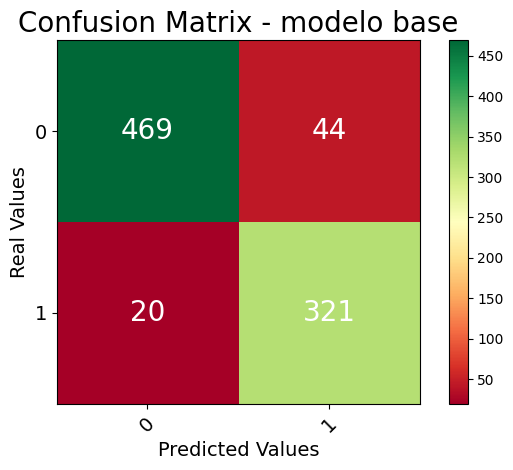

CPU times: user 594 ms, sys: 96.3 ms, total: 690 ms
Wall time: 987 ms


In [ ]:
%%time
evaluate_tradeoff_and_plot_models(
    models={"modelo base": base_model},
    threshold=0.42,
    x_set=X_val,
    y_set=y_val
)

# 6. Hyperparameter Tuning <a name="tuning"></a>

## Tuning parameters

In [ ]:
def optimized_model(optimizer='Adam', activation='relu', initializer='uniform'):
    # Llamamos al objeto Sequential
    model = Sequential()
    # Capa de entrada y primera capa oculta
    model.add(Dense(units = 32, activation=activation, kernel_initializer=initializer, input_shape=(X_train.shape[1],)))
    # Segunda Capa Oculta
    model.add(Dense(units = 16, activation=activation, kernel_initializer=initializer))
    # Capa de Salida
    model.add(Dense(units=1, activation='sigmoid'))

    # Compilamos el modelo
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',  # Specify the loss function here
                  metrics=['accuracy'])  # Specify metrics here

    return model

In [ ]:
param_grid={
    'optimizer': ['SGD', 'Adam'], #nadam, adamax, adadelta, ......
    'activation':['relu', 'softmax'], #sigmoid, linear, softmax ...
    'initializer':['uniform', 'TruncatedNormal'],
    'batch_size':[16, 32, 64],
    'epochs': [20, 50, 80]
}

In [ ]:
def optimize_classification(trained_model, params_to_optimize, x_validation_set, y_validation_set):
  # Establecer una semilla - reproducibilidad
  tf.random.set_seed(42)
  # create model
  model = KerasClassifier(model=trained_model,
                          optimizer='Adam',
                          activation='relu',
                          initializer='uniform',
                          random_state=42)

  # search the grid
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

  results = grid_search.fit(x_validation_set, y_validation_set)

  best_params = results.best_params_
  best_score = results.best_score_
  best_model = results.best_estimator_

  # Resultados
  print(f"Mejor resultado: \n{results.best_score_} , con los mejores hiperparámetros: {results.best_params_}")
  medias = results.cv_results_['mean_test_score']
  desviacion = results.cv_results_['std_test_score']
  parametros = results.cv_results_['params']

  for medias, desviacion, parametros in zip(medias, desviacion, parametros):
    print(f"{medias} y {desviacion} obtenidas con: {parametros}")

  return best_model

In [ ]:
best_model = optimize_classification(optimized_model,
                                     param_grid,
                                     X_val,
                                     y_val)

Epoch 1/80
27/27 [==============================] - 1s 3ms/step - loss: 0.6805 - accuracy: 0.6007
Epoch 2/80
27/27 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6639
Epoch 3/80
27/27 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.8314
Epoch 4/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.9133
Epoch 5/80
27/27 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.9309
Epoch 6/80
27/27 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.9356
Epoch 7/80
27/27 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9344
Epoch 8/80
27/27 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9403
Epoch 9/80
27/27 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.9403
Epoch 10/80
27/27 [==============================] - 0s 5ms/step - loss: 0.1769 - accuracy: 0.9473
Epoch 11/80
27/27 [

In [ ]:
tuned_model = {
    'Tuned ': best_model,
    'Original ANN': base_model
}

In [ ]:
best_model_results = tradeoff_evaluation(x_val=X_test,
                                         y_val=y_test,
                                         models=tuned_model,
                                         threshold=0.42)

27/27 [==============================] - 0s 2ms/step


In [ ]:
best_model_results

,Accuracy,Precision,Recall,F1-Score,Log Loss,Gini,AUC Score
Tuned,0.95,0.92,0.96,0.94,1.65,0.91,0.96
Original ANN,0.91,0.82,0.95,0.88,0.22,0.94,0.97


27/27 [==============================] - 0s 2ms/step


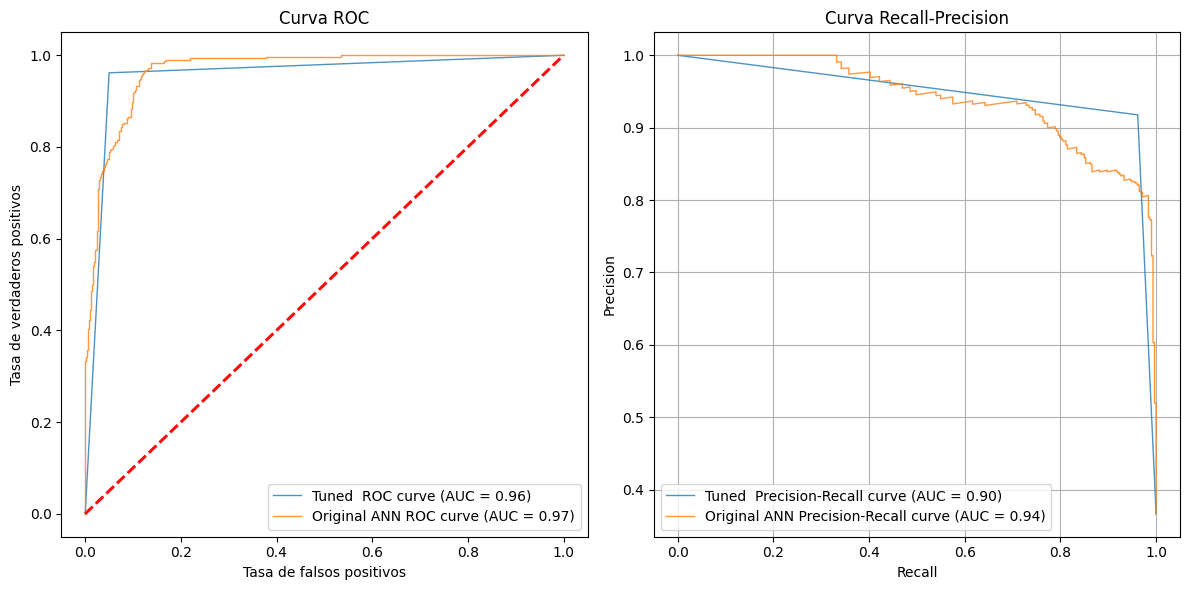

In [ ]:
precision_recall_and_roc_curve(models=tuned_model,
                              X_test=X_test,
                              y_test=y_test)

27/27 [==============================] - 0s 3ms/step


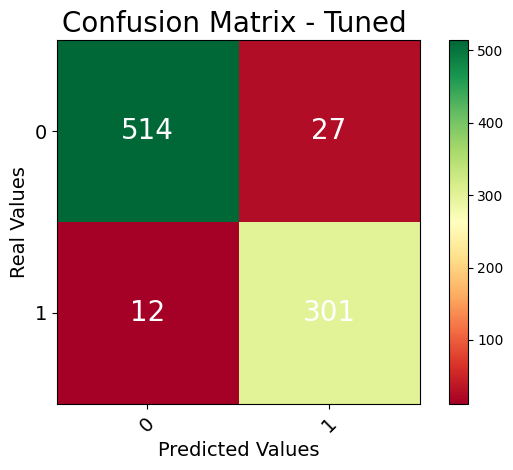

27/27 [==============================] - 0s 2ms/step


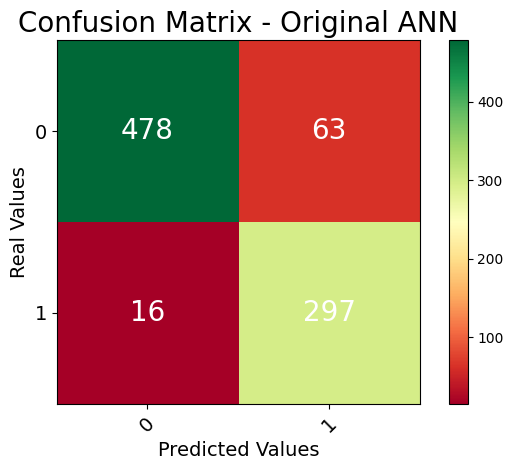

CPU times: user 881 ms, sys: 261 ms, total: 1.14 s
Wall time: 925 ms


In [ ]:
%%time
evaluate_tradeoff_and_plot_models(models=tuned_model,
                                  threshold=0.42,
                                  x_set=X_test,
                                  y_set=y_test)

# 7. Deployment <a name="deployment"></a>

In [ ]:
def save_model_with_pickle(folder_path, file_name, model):
    full_path = f"{folder_path}/{file_name}"

    try:
        with open(full_path, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved successfully at {full_path}")
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")

In [ ]:
folder_path = '/content/drive/Othercomputers/Jesús - Laptop HP/Data Science/PEA Deep Learning for Data Science Professional - URP/9) Clase 8 - 12 03 2024'
file_name = 'loan_approval_model.pkl'

In [ ]:
save_model_with_pickle(folder_path=folder_path,
                       file_name=file_name,
                       model=best_model)

Model saved successfully at /content/drive/Othercomputers/Jesús - Laptop HP/Data Science/PEA Deep Learning for Data Science Professional - URP/9) Clase 8 - 12 03 2024/loan_approval_model.pkl


# 8. Conclusion <a name="conclusion"></a>

In [ ]:
print(f"El modelo es capaz de predecir de forma correcta de los 313 casos que realmente son fraude el {round(297/(297+16)*100, 2)}% de ellos (297).")

El modelo es capaz de predecir de forma correcta de los 313 casos que realmente son fraude el 94.89% de ellos (297).


In [ ]:
print(f"De una muestra de 360 casos de fraude el {round(297/(297+63)*100, 2)}% de ellos son identificados correctamente como fraude (297)")

De una muestra de 360 casos de fraude el 82.5% de ellos son identificados correctamente como fraude (297)
